In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
from dataset import load_svhn, random_split_train_val
from gradient_check import check_layer_gradient, check_layer_param_gradient, check_model_gradient
from layers import FullyConnectedLayer, ReLULayer
from model import TwoLayerNet
from trainer import Trainer, Dataset
from optim import SGD, MomentumSGD
from metrics import multiclass_accuracy

In [3]:
def prepare_for_neural_network(train_X, test_X):
    train_flat = train_X.reshape(train_X.shape[0], -1).astype(float) / 255.0
    test_flat = test_X.reshape(test_X.shape[0], -1).astype(float) / 255.0
    
    # Subtract mean
    mean_image = np.mean(train_flat, axis = 0)
    train_flat -= mean_image
    test_flat -= mean_image
    
    return train_flat, test_flat
    
train_X, train_y, test_X, test_y = load_svhn("data", max_train=10000, max_test=1000)  
old_shape = train_X.shape
print("old shape ", old_shape)
old_test_X = test_X.copy()  
train_X, test_X = prepare_for_neural_network(train_X, test_X)

# Split train into train and val
train_X, train_y, val_X, val_y = random_split_train_val(train_X, train_y, num_val = 1000)

old shape  (10000, 32, 32, 3)


Как всегда, начинаем с кирпичиков

Мы будем реализовывать необходимые нам слои по очереди. Каждый слой должен реализовать:

прямой проход (forward pass), который генерирует выход слоя по входу и запоминает необходимые данные
обратный проход (backward pass), который получает градиент по выходу слоя и вычисляет градиент по входу и по параметрам
Начнем с ReLU, у которого параметров нет.

In [4]:
# TODO: Implement ReLULayer layer in layers.py
# Note: you'll need to copy implementation of the gradient_check function from the previous assignment

X = np.array([[1,-2,3], [-1, 2, 0.1]])

assert check_layer_gradient(ReLULayer(), X)

CHECK GRADIENT
x is 
 [[ 1.  -2.   3. ]
 [-1.   2.   0.1]]
analytic grad is 
 [[ 1.61599406  0.          2.76252524]
 [-0.         -0.5060347  -0.94302519]]
numeric grad array is 
 [[ 1.61599406  0.          2.76252524]
 [ 0.         -0.5060347  -0.94302519]]
Gradient check passed!


In [5]:
# TODO: Implement FullyConnected layer forward and backward methods
assert check_layer_gradient(FullyConnectedLayer(3, 4), X)
# TODO: Implement storing gradients for W and B
assert check_layer_param_gradient(FullyConnectedLayer(3, 4), X, 'W')
assert check_layer_param_gradient(FullyConnectedLayer(3, 4), X, 'B')

CHECK GRADIENT
x is 
 [[ 1.  -2.   3. ]
 [-1.   2.   0.1]]
analytic grad is 
 [[ 4.18948095e-04  1.76337767e-03 -3.49979411e-04]
 [ 7.82747412e-05 -6.12293143e-04 -1.09946675e-03]]
numeric grad array is 
 [[ 4.18948095e-04  1.76337767e-03 -3.49979411e-04]
 [ 7.82747412e-05 -6.12293143e-04 -1.09946675e-03]]
Gradient check passed!
CHECK GRADIENT
x is 
 [[-1.97365551e-03  6.80635002e-04  5.55869402e-05  5.41565103e-04]
 [ 1.83213048e-04 -5.59157557e-04  8.94307167e-04  1.98126611e-04]
 [-1.28938649e-03  1.30851716e-03 -1.43047956e-03  9.00929234e-04]]
analytic grad is 
 [[-1.67429365  2.15318718 -0.15893916 -0.56958173]
 [ 3.34858731 -4.30637437  0.31787831  1.13916345]
 [-0.36258122  5.45842018 -3.37773459 -0.89339967]]
numeric grad array is 
 [[-1.67429365  2.15318718 -0.15893916 -0.56958173]
 [ 3.34858731 -4.30637437  0.31787831  1.13916345]
 [-0.36258122  5.45842018 -3.37773459 -0.89339967]]
Gradient check passed!
CHECK GRADIENT
x is 
 [[-1.33418835e-03  2.29823155e-04  1.28956322e-03

In [6]:
# TODO: In model.py, implement compute_loss_and_gradients function
batch_size = 2
model = TwoLayerNet(n_input = train_X.shape[1], n_output = 10, hidden_layer_size = 3, reg = 0)
loss = model.compute_loss_and_gradients(train_X[:batch_size], train_y[:batch_size])

# TODO Now implement backward pass and aggregate all of the params
check_model_gradient(model, train_X[:batch_size], train_y[:batch_size])

Checking gradient for W1
CHECK GRADIENT
x is 
 [[ 5.55132245e-04 -8.29725676e-04 -9.95647818e-04]
 [ 7.71607110e-04  8.55758768e-04 -1.27373828e-03]
 [-1.23679768e-03 -4.45049694e-04 -7.11304833e-04]
 ...
 [-1.27559794e-03 -5.69992050e-04  4.02575187e-04]
 [ 2.28669670e-04  1.30825243e-03  7.03814008e-06]
 [-1.76402810e-04 -1.57398266e-03 -8.06722910e-04]]
analytic grad is 
 [[ 2.10787160e-05  0.00000000e+00 -4.47056165e-05]
 [ 2.51157965e-05  0.00000000e+00 -9.99876323e-06]
 [ 7.14281875e-05  0.00000000e+00  8.78028877e-05]
 ...
 [-1.96137432e-04  0.00000000e+00 -1.67966637e-04]
 [-1.75261159e-04  0.00000000e+00 -1.05706581e-04]
 [-1.39601392e-04  0.00000000e+00 -5.89752946e-06]]
numeric grad array is 
 [[ 2.10787388e-05  0.00000000e+00 -4.47056170e-05]
 [ 2.51157761e-05  0.00000000e+00 -9.99875738e-06]
 [ 7.14281967e-05  0.00000000e+00  8.78028317e-05]
 ...
 [-1.96137417e-04  0.00000000e+00 -1.67966618e-04]
 [-1.75261183e-04  0.00000000e+00 -1.05706555e-04]
 [-1.39601397e-04  0.00000

True

In [7]:
# TODO Now implement l2 regularization in the forward and backward pass
model_with_reg = TwoLayerNet(n_input = train_X.shape[1], n_output = 10, hidden_layer_size = 3, reg = 1e1)
loss_with_reg = model_with_reg.compute_loss_and_gradients(train_X[:2], train_y[:2])
assert loss_with_reg > loss and not np.isclose(loss_with_reg, loss), \
    "Loss with regularization (%2.4f) should be higher than without it (%2.4f)!" % (loss, loss_with_reg)

check_model_gradient(model_with_reg, train_X[:2], train_y[:2])

Checking gradient for W1
CHECK GRADIENT
x is 
 [[-9.88162631e-04 -5.62436018e-05 -1.06671111e-03]
 [ 7.69188816e-04  4.08942767e-04  5.49801863e-04]
 [ 1.13086936e-03 -3.37809772e-04  1.07450757e-03]
 ...
 [-4.79073444e-04  3.42822914e-04 -1.04962798e-04]
 [ 1.54995685e-03 -3.56086006e-04  4.46385075e-04]
 [ 1.08696651e-03  6.55927424e-04  5.42182697e-04]]
analytic grad is 
 [[-0.01976325 -0.00123181 -0.02137282]
 [ 0.01538378  0.00813634  0.01095005]
 [ 0.02261739 -0.00664902  0.02135936]
 ...
 [-0.00958147  0.00670568 -0.00174011]
 [ 0.03099914 -0.00716936  0.00924862]
 [ 0.02173933  0.01323425  0.01109928]]
numeric grad array is 
 [[-0.01976325 -0.00123181 -0.02137282]
 [ 0.01538378  0.00813634  0.01095005]
 [ 0.02261739 -0.00664902  0.02135936]
 ...
 [-0.00958147  0.00670568 -0.00174011]
 [ 0.03099914 -0.00716936  0.00924862]
 [ 0.02173933  0.01323425  0.01109928]]
Gradient check passed!
Checking gradient for B1
CHECK GRADIENT
x is 
 [[-0.00050679  0.00011694  0.0004614 ]]
analytic

True

In [8]:
# Finally, implement predict function!

# TODO: Implement predict function
# What would be the value we expect?
multiclass_accuracy(model_with_reg.predict(train_X[:30]), train_y[:30]) 

0.1

**Допишем код для процесса тренировки**


Если все реализовано корректно, значение функции ошибки должно уменьшаться с каждой эпохой, пусть и медленно. Не беспокойтесь пока про validation accuracy.

In [79]:
model = TwoLayerNet(n_input = train_X.shape[1], n_output = 10, hidden_layer_size = 100, reg = 1e-3)
dataset = Dataset(train_X, train_y, val_X, val_y)
trainer = Trainer(model, dataset, SGD(), num_epochs =20, batch_size=20, learning_rate = 1e-2)

# TODO Implement missing pieces in Trainer.fit function
# You should expect loss to go down every epoch, even if it's slow
loss_history, train_history, val_history = trainer.fit()

X shape is
 (9000, 3072)
y shape is
 (9000,)
Loss: 45.219157, Train accuracy: 0.377444, val accuracy: 0.372000
Loss: 32.376462, Train accuracy: 0.510667, val accuracy: 0.518000
Loss: 24.543422, Train accuracy: 0.631889, val accuracy: 0.618000
Loss: 25.793749, Train accuracy: 0.666444, val accuracy: 0.658000
Loss: 14.833858, Train accuracy: 0.705333, val accuracy: 0.666000
Loss: 22.935265, Train accuracy: 0.700000, val accuracy: 0.646000
Loss: 11.117177, Train accuracy: 0.744778, val accuracy: 0.669000
Loss: 21.356227, Train accuracy: 0.682556, val accuracy: 0.646000
Loss: 13.312190, Train accuracy: 0.753333, val accuracy: 0.689000
Loss: 16.728792, Train accuracy: 0.752889, val accuracy: 0.669000
Loss: 15.581730, Train accuracy: 0.766333, val accuracy: 0.708000
Loss: 17.495122, Train accuracy: 0.767333, val accuracy: 0.699000
Loss: 24.410862, Train accuracy: 0.801000, val accuracy: 0.718000
Loss: 13.821111, Train accuracy: 0.796556, val accuracy: 0.699000
Loss: 20.225647, Train accuracy

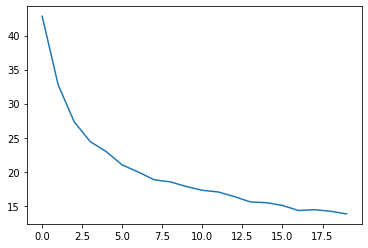

In [82]:
plt.plot(loss_history)
# plt.plot(train_history)
# plt.plot(val_history)

test x is  (1000, 3072)
test pred is 
 [2 1 3 2 2 5 9 1 7 1]
test_y  is 
 [2 1 3 0 2 5 0 1 7 1]


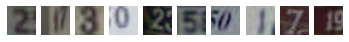

Neural network classifier test set accuracy: 70.100000


In [83]:
# model = TwoLayerNet(n_input = train_X.shape[1], n_output = 10, hidden_layer_size = 100, reg = 1e1)


number = 10
print("test x is ", test_X.shape)
test_pred = model.predict(test_X[:number])
print("test pred is \n", test_pred)
print("test_y  is \n", test_y[:number])
plot_index = 1
for class_index in range(number):
        plt.subplot(1, number, plot_index)
        
        image = old_test_X[class_index]
        plt.imshow(image.astype(np.uint8))
        plt.axis('off')
        plot_index += 1

plt.show()
# print("test pred is \n", test_pred[:number])

test_pred = model.predict(test_X)
test_accuracy = multiclass_accuracy(test_pred, test_y)*100
print('Neural network classifier test set accuracy: %f' % (test_accuracy, ))

# Улучшаем процесс тренировки
Мы реализуем несколько ключевых оптимизаций, необходимых для тренировки современных нейросетей.

**Уменьшение скорости обучения (learning rate decay)**
Одна из необходимых оптимизаций во время тренировки нейронных сетей - постепенное уменьшение скорости обучения по мере тренировки.

Один из стандартных методов - уменьшение скорости обучения (learning rate) каждые N эпох на коэффициент d (часто называемый decay). Значения N и d, как всегда, являются гиперпараметрами и должны подбираться на основе эффективности на проверочных данных (validation data).

В нашем случае N будет равным 1.

In [84]:
# # TODO Implement learning rate decay inside Trainer.fit method
# # Decay should happen once per epoch

# model = TwoLayerNet(n_input = train_X.shape[1], n_output = 10, hidden_layer_size = 100, reg = 1e-3)
# dataset = Dataset(train_X, train_y, val_X, val_y)
# trainer = Trainer(model, dataset, SGD(),learning_rate = 1e-2, learning_rate_decay=0.99)

# initial_learning_rate = trainer.learning_rate
# loss_history, train_history, val_history = trainer.fit()

# assert trainer.learning_rate < initial_learning_rate, "Learning rate should've been reduced"
# assert trainer.learning_rate > 0.5*initial_learning_rate, "Learning rate shouldn'tve been reduced that much!"

# Накопление импульса (Momentum SGD)

Другой большой класс оптимизаций - использование более эффективных методов градиентного спуска. Мы реализуем один из них - накопление импульса (Momentum SGD).

Этот метод хранит скорость движения, использует градиент для ее изменения на каждом шаге, и изменяет веса пропорционально значению скорости. (Физическая аналогия: Вместо скорости градиенты теперь будут задавать ускорение, но будет присутствовать сила трения.)

velocity = momentum * velocity - learning_rate * gradient 

w = w + velocity

momentum здесь коэффициент затухания, который тоже является гиперпараметром (к счастью, для него часто есть хорошее значение по умолчанию, типичный диапазон -- 0.8-0.99).

Несколько полезных ссылок, где метод разбирается более подробно:

http://cs231n.github.io/neural-networks-3/#sgd

https://distill.pub/2017/momentum/

In [116]:
# TODO: Implement MomentumSGD.update function in optim.py

model = TwoLayerNet(n_input = train_X.shape[1], n_output = 10, hidden_layer_size = 100, reg = 1e-3)
dataset = Dataset(train_X, train_y, val_X, val_y)
trainer = Trainer(model, dataset, MomentumSGD(), learning_rate=1e-2, learning_rate_decay=0.99)

# You should see even better results than before!
loss_history, train_history, val_history = trainer.fit()

X shape is
 (9000, 3072)
y shape is
 (9000,)
Epoch: 1, Loss: 39.840675, Train accuracy: 0.358444, val accuracy: 0.364000
Epoch: 2, Loss: 35.365019, Train accuracy: 0.492111, val accuracy: 0.492000
Epoch: 3, Loss: 19.768869, Train accuracy: 0.628444, val accuracy: 0.610000
Epoch: 4, Loss: 21.671936, Train accuracy: 0.687000, val accuracy: 0.660000
Epoch: 5, Loss: 16.404758, Train accuracy: 0.680111, val accuracy: 0.654000
Epoch: 6, Loss: 15.421092, Train accuracy: 0.710444, val accuracy: 0.673000
Epoch: 7, Loss: 15.369158, Train accuracy: 0.741000, val accuracy: 0.683000
Epoch: 8, Loss: 5.838517, Train accuracy: 0.744444, val accuracy: 0.666000
Epoch: 9, Loss: 19.996582, Train accuracy: 0.787889, val accuracy: 0.720000
Epoch: 10, Loss: 14.292280, Train accuracy: 0.759222, val accuracy: 0.691000
Epoch: 11, Loss: 26.552167, Train accuracy: 0.778889, val accuracy: 0.696000
Epoch: 12, Loss: 21.462628, Train accuracy: 0.799111, val accuracy: 0.709000
Epoch: 13, Loss: 6.641910, Train accuracy

learning rate is  0.008179069375972308


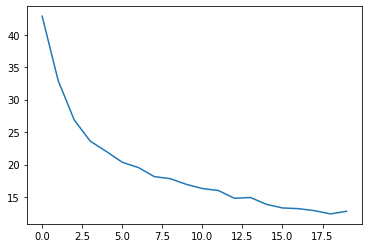

test x shape is  (1000, 3072)
test pred is 
 [2 1 3 9 2 5 0 1 7 1]
test_y  is 
 [2 1 3 0 2 5 0 1 7 1]


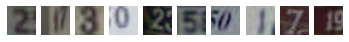

Neural network classifier test set accuracy: 69.200000


In [127]:
print("learning rate is ", trainer.learning_rate)
# print("initial learning rate is ", initial_learning_rate)
plt.plot(loss_history)
plt.show()

number = 10
print("test x shape is ", test_X.shape)
test_pred = model.predict(test_X[:number])
print("test pred is \n", test_pred)
print("test_y  is \n", test_y[:number])

for i in range(number):
        plt.subplot(1, number, i+1)        
        image = old_test_X[i].astype(np.uint8)
        plt.imshow(image)
        plt.axis('off')

plt.show()
# print("test pred is \n", test_pred[:number])

test_pred = model.predict(test_X)
test_accuracy = multiclass_accuracy(test_pred, test_y)*100
print('Neural network classifier test set accuracy: %f' % (test_accuracy, ))

# Ну что, давайте уже тренировать сеть!
Последний тест - переобучимся (overfit) на маленьком наборе данных
Хороший способ проверить, все ли реализовано корректно - переобучить сеть на маленьком наборе данных.
Наша модель обладает достаточной мощностью, чтобы приблизить маленький набор данных идеально, поэтому мы ожидаем, что на нем мы быстро дойдем до 100% точности на тренировочном наборе.

Если этого не происходит, то где-то была допущена ошибка!

X shape is
 (15, 3072)
y shape is
 (15,)
Epoch: 1, Loss: 11.520984, Train accuracy: 0.200000, val accuracy: 0.066667
Epoch: 2, Loss: 11.507926, Train accuracy: 0.200000, val accuracy: 0.066667
Epoch: 3, Loss: 11.424589, Train accuracy: 0.200000, val accuracy: 0.066667
Epoch: 4, Loss: 11.382415, Train accuracy: 0.266667, val accuracy: 0.066667
Epoch: 5, Loss: 11.288209, Train accuracy: 0.333333, val accuracy: 0.066667
Epoch: 6, Loss: 11.451626, Train accuracy: 0.333333, val accuracy: 0.066667
Epoch: 7, Loss: 11.317843, Train accuracy: 0.266667, val accuracy: 0.000000
Epoch: 8, Loss: 11.344397, Train accuracy: 0.266667, val accuracy: 0.000000
Epoch: 9, Loss: 11.079330, Train accuracy: 0.266667, val accuracy: 0.000000
Epoch: 10, Loss: 11.291173, Train accuracy: 0.266667, val accuracy: 0.000000
Epoch: 11, Loss: 11.032711, Train accuracy: 0.266667, val accuracy: 0.000000
Epoch: 12, Loss: 11.047324, Train accuracy: 0.266667, val accuracy: 0.000000
Epoch: 13, Loss: 11.010495, Train accuracy: 

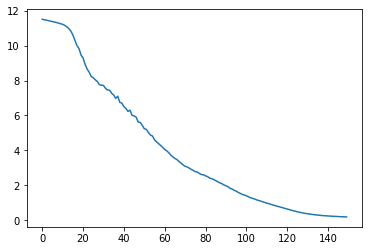

test x shape is  (1000, 3072)
test pred is 
 [2 2 4 1 2 3 9 1 2 2]
test_y  is 
 [2 1 3 0 2 5 0 1 7 1]


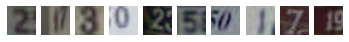

Neural network classifier test set accuracy: 100.000000


In [131]:
# data_size = 15
# model = TwoLayerNet(n_input = train_X.shape[1], n_output = 10, hidden_layer_size = 100, reg = 1e-3)
# dataset = Dataset(train_X[:data_size], train_y[:data_size], val_X[:data_size], val_y[:data_size])
# trainer = Trainer(model, dataset, SGD(), learning_rate=1e-2, num_epochs=150, batch_size=5)

# # You should expect this to reach 1.0 training accuracy 
# loss_history, train_history, val_history = trainer.fit()
# #############################################################################

# print("learning rate is ", trainer.learning_rate)
# # print("initial learning rate is ", initial_learning_rate)
# plt.plot(loss_history)
# plt.show()

# number = 10
# print("test x shape is ", test_X.shape)
# test_pred = model.predict(test_X[:number])
# print("test pred is \n", test_pred)
# print("test_y  is \n", test_y[:number])

# for i in range(number):
#         plt.subplot(1, number, i+1)        
#         image = old_test_X[i].astype(np.uint8)
#         plt.imshow(image)
#         plt.axis('off')

# plt.show()
# # print("test pred is \n", test_pred[:number])

# test_pred = model.predict(test_X)
# test_accuracy = multiclass_accuracy(test_pred, test_y)*100
# print('Neural network classifier test set accuracy: %f' % (test_accuracy, ))

In [111]:

# X = np.array([[1,-2,3],
#               [-1, 2, 0.1]])

# Y = np.array([[1,3,3],
#               [-1, 2, 0.1]])
# # print(X*Y)

# # lst = [a, 4,3]
# mapa = {'X': X, 'Y': Y}
# # print("loss is ", loss)

# loss_lst = [np.sum(param**2) for param in mapa.values()]
# loss =  sum(loss_lst)

a = [2,3]
b = a
b[0] = 44
print (a)
# print("X is \n", X)
# print("mapa is \n", mapa)
# # print("reg loss params is\n", reg_loss_params)
# print("loss lst\n", loss_lst)
# print("loss ", loss)

[44, 3]
